/tmp/ipython-input-2681806571.py:18: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bank-additional-full.csv", sep=",")


Dataset shape: (41188, 21)

Columns:
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Target distribution:
y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

Encoded feature shape: (41188, 196)

Confusion Matrix:
[[6050 1260]
 [ 305  623]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7310
           1       0.33      0.67      0.44       928

    accuracy                           0.81      8238
   macro avg       0.64      0.75      0.66      8238
weighted avg       0.88      0.81      0.84      8238


Top 10 Important Features:
nr.employed          0.672769
cons.conf.idx        0.135524
euribor3m            0.048650
cons.price.idx       0.040701
p

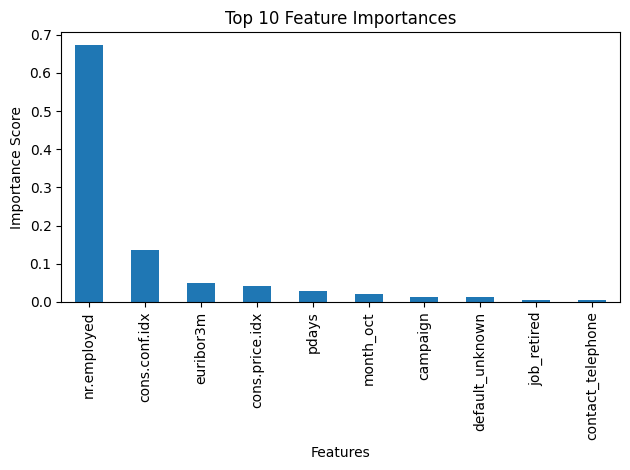


Sample Prediction:
Customer will subscribe: NO


In [2]:
# =========================================
# BANK MARKETING – DECISION TREE CLASSIFIER
# =========================================

# 1. IMPORT LIBRARIES
# ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------------------
# 2. LOAD DATASET (IMPORTANT: sep=";")
# -----------------------------------------
df = pd.read_csv("bank-additional-full.csv", sep=",")

print("Dataset shape:", df.shape)
print("\nColumns:")
print(df.columns)

# -----------------------------------------
# 3. TARGET VARIABLE
# -----------------------------------------
# y = yes/no → convert to binary
df["y"] = df["y"].map({"yes": 1, "no": 0})

print("\nTarget distribution:")
print(df["y"].value_counts(normalize=True))

# -----------------------------------------
# 4. REMOVE DATA LEAKAGE
# -----------------------------------------
# duration must be removed (known only AFTER the call)
df = df.drop(columns=["duration"])

# -----------------------------------------
# 5. SEPARATE FEATURES & TARGET
# -----------------------------------------
X = df.drop(columns=["y"])
y = df["y"]

# -----------------------------------------
# 6. ONE-HOT ENCODING (CATEGORICAL VARIABLES)
# -----------------------------------------
X_encoded = pd.get_dummies(X, drop_first=True)

print("\nEncoded feature shape:", X_encoded.shape)

# -----------------------------------------
# 7. TRAIN-TEST SPLIT
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -----------------------------------------
# 8. TRAIN DECISION TREE (HANDLE IMBALANCE)
# -----------------------------------------
model = DecisionTreeClassifier(
    max_depth=6,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

# -----------------------------------------
# 9. MODEL EVALUATION
# -----------------------------------------
y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------------------
# 10. FEATURE IMPORTANCE
# -----------------------------------------
feature_importance = pd.Series(
    model.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# -----------------------------------------
# 11. FEATURE IMPORTANCE VISUALIZATION
# -----------------------------------------
plt.figure()
feature_importance.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

# -----------------------------------------
# 12. SAMPLE PREDICTION
# -----------------------------------------
sample = X_encoded.iloc[[0]]
prediction = model.predict(sample)[0]

print("\nSample Prediction:")
print("Customer will subscribe:", "YES" if prediction == 1 else "NO")
